# Analyzing and Visualizing Data About  <a href="https://twitter.com/dog_rates"> WeRateDogs </a> Twitter Account
Abdullah Almuzaini

## Introduction 

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. The account was started in 2015 by college student Matt Nelson and has received international media attention both for its popularity (<a href = "https://en.wikipedia.org/wiki/WeRateDogs">Wikipedia</a>). 

In this report, I will show some insights that I was able to derive by analyzing a dataset, archive, that WeRateDogs Twitter account's owner downloaded and sent to Udacity. The dataset needed some additional data to be collected. Some I was provided with by Udacity and other information I had to extract directly from the Twitter account using the tweet ids in the archive. 

## General outlook on the numbers in the dataset

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
print(os.environ['PATH'])
sns.set()
%config InlineBackend.figure_format = 'retina'


df = pd.read_csv('dataset/twitter_archive_master.csv')
df[['rating_numerator','rating_denominator','retweet_count','likes_count']].describe()

/Users/mozaini/opt/anaconda3/bin:/Users/mozaini/opt/anaconda3/condabin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin


,rating_numerator,rating_denominator,retweet_count,likes_count
count,2171.000000,2171.000000,2171.000000,2171.000000
mean,12.993643,10.493782,2291.104560,7728.677107
std,44.401151,7.025519,4086.316845,11424.970702
min,0.000000,0.000000,0.000000,0.000000
25%,10.000000,10.000000,490.500000,1619.000000
50%,11.000000,10.000000,1089.000000,3482.000000
75%,12.000000,10.000000,2604.500000,9570.500000
max,1776.000000,170.000000,72709.000000,148097.000000


As we can see from the above table., the majority, more than 75%, of data in rating_numerator fall between 1 to 12. Also, most of the values in the rating_denominator column are equal to 10. These figures have me performed further analysis to find out the actual percentages. Hence, after doing a deeper investigation on ratings, I have found out that the portion of the rating_numerator that is 12 or less happened to be 83% more or less, and the percentage of rating_denominator that is 10 is approximately 99%.

Therefore, I have decided to exclude any record that does not have a rating_denominator of 10 and has a rating_numerator greater than 12 to perfume the coming analysis.


In [10]:
adj_ratings_df = df.query('rating_denominator == 10 and rating_numerator <= 12').copy()

## What is the most popular dog stage?

In [24]:
adj_ratings_df.groupby('dog_stage')['rating_numerator'].count()


dog_stage
Doggo       46
Floofer      7
Pupper     206
Puppo       13
Name: rating_numerator, dtype: int64

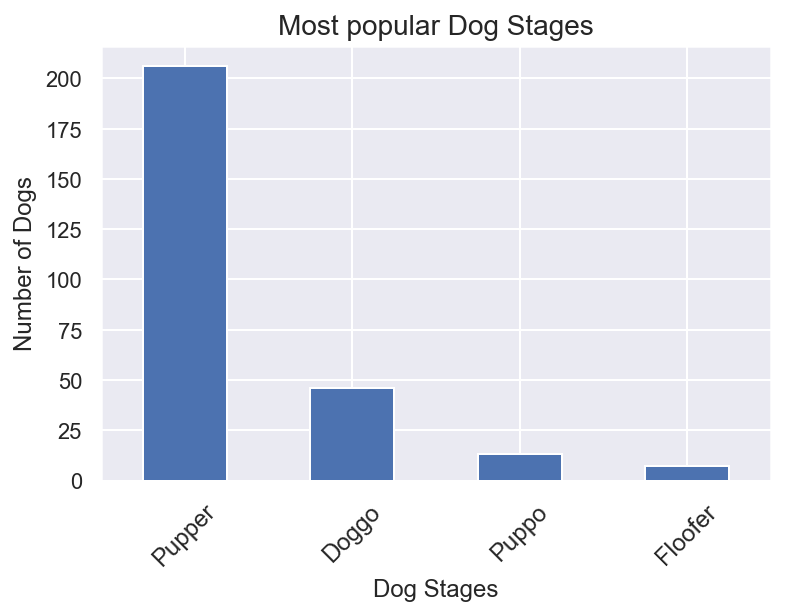

In [17]:
# The following chart will disply the most popular dog stages exist in our dataset

adj_ratings_df.dog_stage.value_counts().plot(kind='bar');
plt.title("Most popular Dog Stages", fontsize=14);
plt.xlabel('Dog Stages');
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Number of Dogs', fontsize=12)
plt.savefig('images/popular_dog_stages.pdf')
plt.show();

It turns out that Pupper is the most popular dog stage we have in the dataset, with 206 dogs mentioned. The second famous dog stage in the data is Doggo (46 dogs mentioned that is Doggo). The two least popular dogs are Puppo and Floofer, with only 13 and 7 dogs, respectively. 

## What is the average rate for each dog stage?

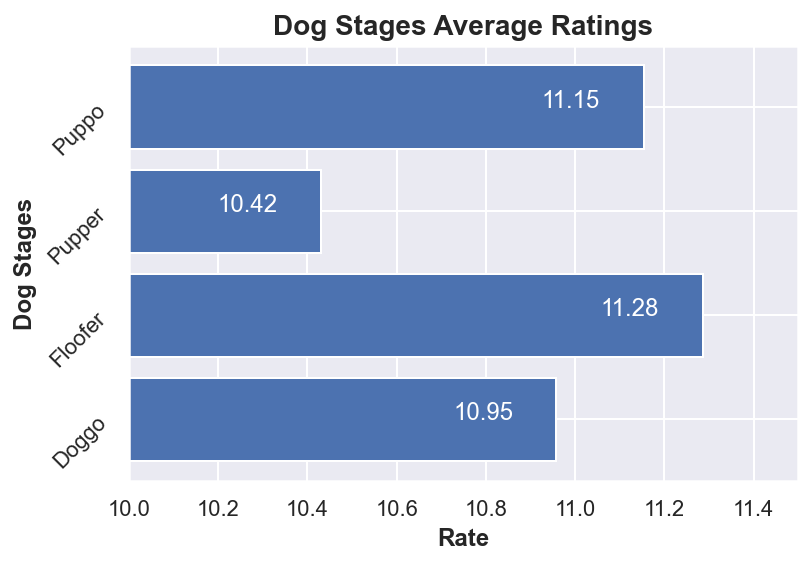

In [26]:
stage_by_rate = adj_ratings_df.groupby('dog_stage').rating_numerator.mean()
fig, ax = plt.subplots()
ax.barh(stage_by_rate.index, stage_by_rate.values)
plt.title("Dog Stages Average Ratings",fontsize=14, weight = 'bold');
plt.xlim(10, 11.5)
plt.yticks(rotation=45)
plt.xlabel('Rate',fontsize=12, weight = 'bold');
plt.ylabel('Dog Stages',fontsize=12, weight = 'bold')
for i, v in enumerate(stage_by_rate.values):
    ax.text(v-.23 , i , str(v)[:5], color='white')
plt.savefig('images/rank.pdf')
plt.show();

As we can see from the above bar chart, Floofer has the highest average rate among the other stages. It has an average rate of 11.28. The next comes Puppo, with an average rating of 11.15. The remaining dog stages Doggo and Pupper have the lowest average rates, with 10.95 and 10.42, respectively. 

## What are the sources of the tweets?

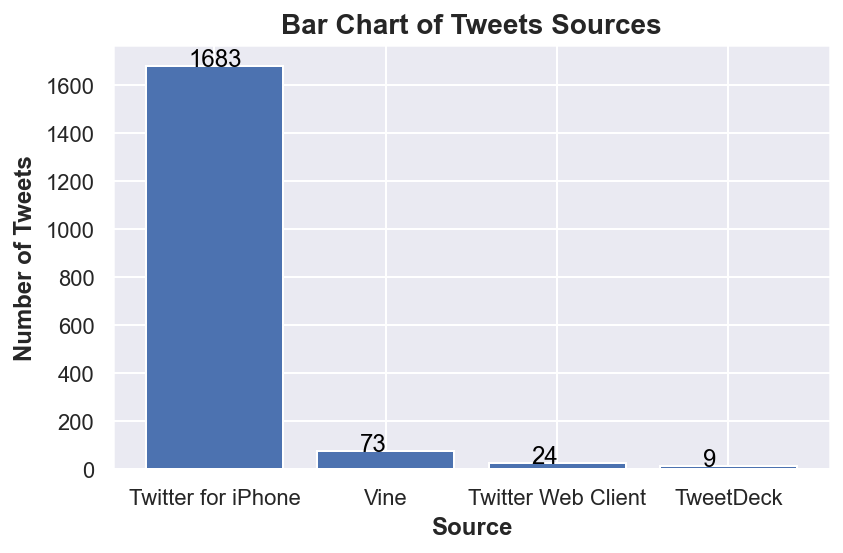

In [30]:
source = adj_ratings_df.source.value_counts()
fig, ax = plt.subplots()
ax.bar(source.index, source.values)
plt.title('Bar Chart of Tweets Sources', weight= 'bold', fontsize = 14)
plt.xlabel('Source',fontsize=12, weight = 'bold')
plt.ylabel('Number of Tweets',fontsize=12, weight = 'bold')
for i, v in enumerate(source.values):
    ax.text(i-.15 , v ,v, color='black')
    
plt.tight_layout()
plt.savefig('images/tweet_source.pdf')

plt.show()

In [31]:

for i in source.index:
    print(i, str(round((source[i]/adj_ratings_df.shape[0]) * 100))+'%')

Twitter for iPhone 94%
Vine 4%
Twitter Web Client 1%
TweetDeck 1%


We can notice from the chart and percentages above that most of the tweets were posted from the Twitter application on the iPhone. About 94% of the tweets came from iPhone using the official Twitter application. The rest of the tweets came from outside sources, like Vine, Twitter Web cline, and TweetDeck.

## Is there any correlation Between `retweet_count`,`rating_numerator`,  and `likes_count` ?

In [32]:
corr = adj_ratings_df[['retweet_count','rating_numerator', 'likes_count']]
corr.corr()

,retweet_count,rating_numerator,likes_count
retweet_count,1.000000,0.216816,0.912977
rating_numerator,0.216816,1.000000,0.286281
likes_count,0.912977,0.286281,1.000000


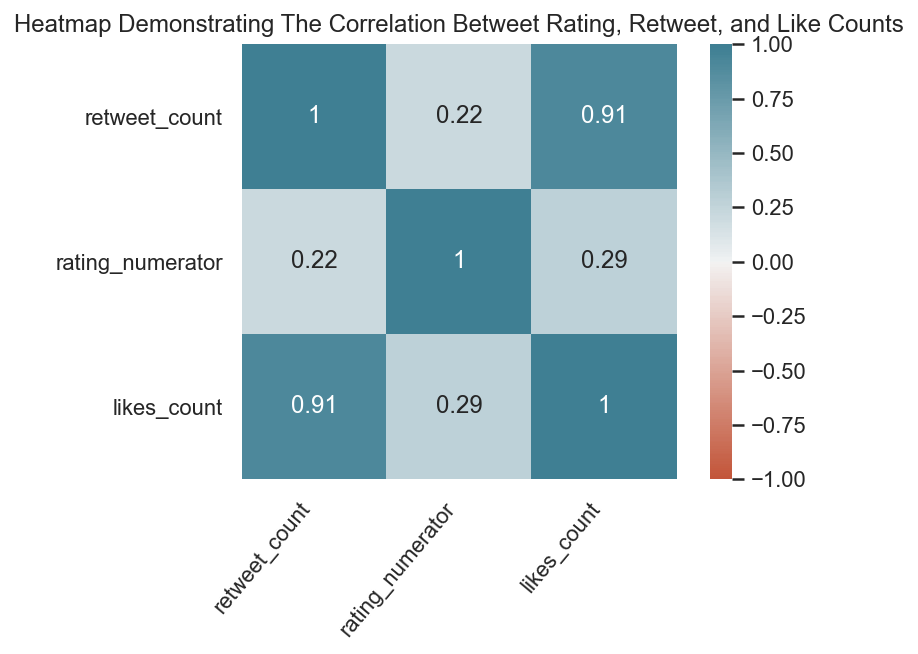

In [33]:
corr = corr.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=50,
    horizontalalignment='right'
);
plt.title('Heatmap Demonstrating The Correlation Betweet Rating, Retweet, and Like Counts')
plt.savefig('images/heatmap.pdf')
plt.show();



From the above heatmap we can conclude that there is a strong and postive correlation between the number of retweet and number of likes with correlation coefficient of 0.91, while there is no Correlation between the those variables and ratings.

## What are the most frequent dogs' names? 

In [79]:
adj_ratings_df.name.value_counts()[:10], adj_ratings_df.name.value_counts()[len(adj_ratings_df.name.value_counts())-5:]

(Lucy       9
 Penny      9
 Cooper     9
 Charlie    8
 Winston    8
 Sadie      8
 Oliver     7
 Bailey     6
 Lola       6
 Tucker     6
 Name: name, dtype: int64,
 Obi        1
 Sailor     1
 Sully      1
 Glacier    1
 Travis     1
 Name: name, dtype: int64)

Lucy, Penny, and Cooper have shown to be the most popular names listed among the dogs rated by the <a href="https://twitter.com/dog_rates"> WeRateDogs</a> as each one of these names appeared nine times. Next comes Charlie, Winston, and Sadie, with eight mentions per each name. On the other hand, the least common names among the listed dogs are Obi, Sailor, Sully, Glacier, and Travis, as there were only mentioned once.

## Genders of Dogs

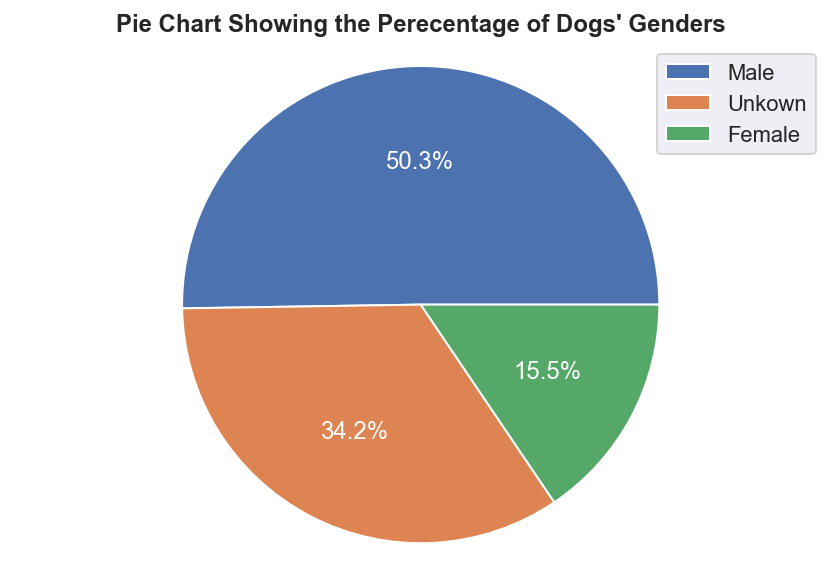

In [80]:
patches, _, autotexts = plt.pie(adj_ratings_df.dog_gender.value_counts(),  autopct='%1.1f%%');
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(patches, list(adj_ratings_df.dog_gender.value_counts().index), loc="best");
plt.axis('equal')
plt.tight_layout();
plt.title("Pie Chart Showing the Perecentage of Dogs' Genders", fontweight = "bold")
%config InlineBackend.figure_format = 'retina'
plt.savefig('images/figure.pdf')

After analyzing each tweet looking for pronouns and possessives in order to determine the gender of each dog, I have found that the male dogs dominated the dataset by 50.3%, while females only composed approximately 15.5% of the dogs, as far my analysis went. However, due to the lack of pronouns and possessives that could be used as indications to determine genders in tweets, I have not been able to classify about 34.2% of dogs, and I opted to label them as unknown until further analysis.

## The average rating numerator per each gender 

In [88]:
x= adj_ratings_df.groupby('dog_gender')[['dog_gender','rating_numerator']].mean()
x

,rating_numerator
dog_gender,
Female,10.739209
Male,10.141824
Unkown,9.811601


As shown in the above table, we notice that female dogs have a more average rate than male dogs. Female dogs have an average rate of 10,74, while males received 10.14 as an average rating. On the other hand, the unknown dogs' genders have got only 9.81 as an average rating. 